#K-Means algorithm using Python from scratch.

K Means algorithm is an unsupervised learning algorithm, ie. it needs no training data, it performs the computation on the actual dataset. This should be apparent from the fact that in K Means, we are just trying to group similar data points into clusters, there is no prediction involved.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**1. Read Training Data**

Using pandas to read the file

In [ ]:
# Load the dataset
file_path = 'Mall_Customers.csv'  # Update the path if needed
mall_customers_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
mall_customers_df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Display the shape of the dataset

In [ ]:

print("Dataset Shape:", mall_customers_df.shape)

# Basic information about the dataset
mall_customers_df.info()

# Descriptive statistics
mall_customers_df.describe()


Dataset Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


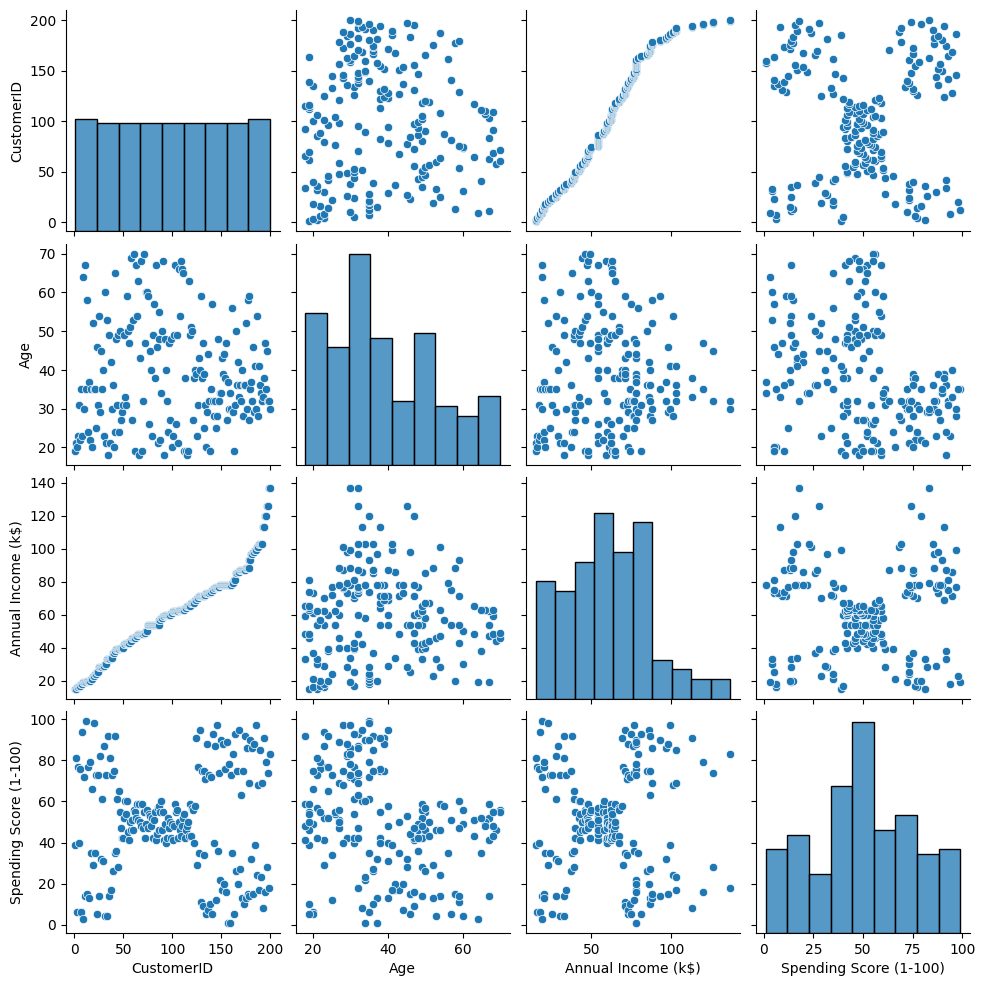

In [ ]:
# Pairplot to visualize the relationships between features
sns.pairplot(mall_customers_df)
plt.show()


#Data processing


In [ ]:
# Check for missing values
missing_values = mall_customers_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Encoding categorical data
mall_customers_df['Genre'] = mall_customers_df['Genre'].map({'Male': 0, 'Female': 1})

In [ ]:
# Selecting features for clustering
features = mall_customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Implementing K-Means Algorithm

In [ ]:
import numpy as np

class KMeans:
    def __init__(self, k=2, max_iters=100, random_state=42):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.k]]
        return centroids

    def closest_centroid(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def compute_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            old_centroids = self.centroids
            labels = self.closest_centroid(X)
            self.centroids = self.compute_centroids(X, labels)
            if np.all(old_centroids == self.centroids):
                break

    def predict(self, X):
        return self.closest_centroid(X)

In [ ]:
# Number of clusters
k = 5

# Initialize and fit KMeans
kmeans = KMeans(k=k)
kmeans.fit(scaled_features)

# Predict the cluster for each instance
clusters = kmeans.predict(scaled_features)


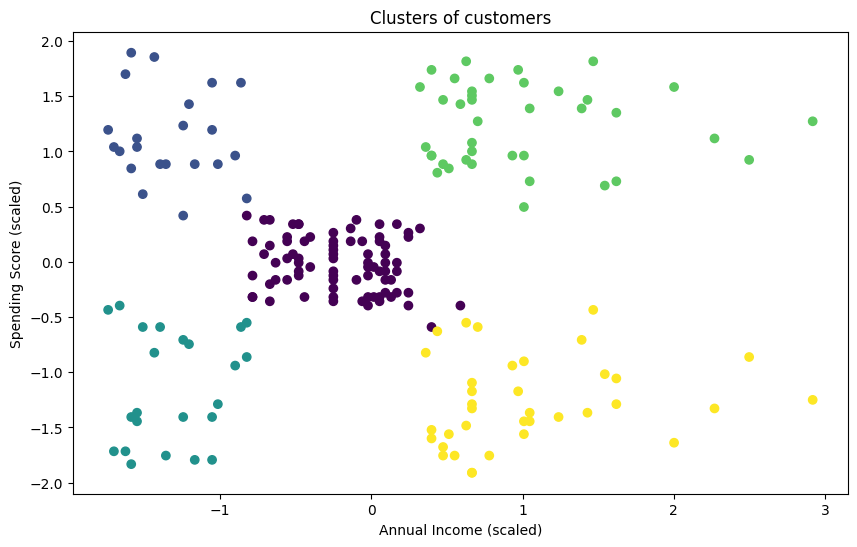

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Clusters of customers')
plt.show()


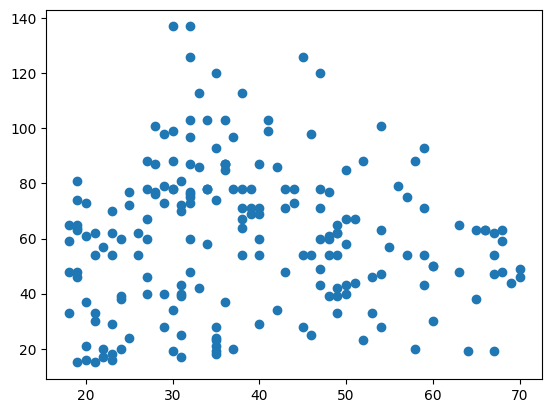

In [ ]:
plt.scatter(mall_customers_df.Age,mall_customers_df['Annual Income (k$)'])

In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters
km = KMeans(n_clusters=3)

# Fit the model and predict the clusters
y_predicted = km.fit_predict(mall_customers_df[['Age', 'Annual Income (k$)']])

# Output the predicted clusters
y_predicted


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
mall_customers_df['cluster']=y_predicted
mall_customers_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1


In [ ]:
km.cluster_centers_


array([[34.34782609, 82.82608696],
       [28.36      , 31.44      ],
       [55.03448276, 50.34482759]])

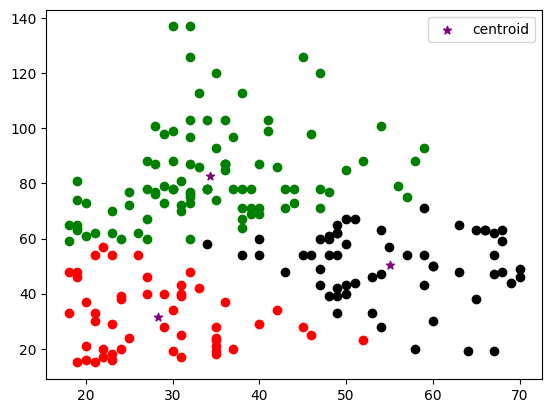

In [ ]:
df1 = mall_customers_df[mall_customers_df.cluster==0]
df2 = mall_customers_df[mall_customers_df.cluster==1]
df3 = mall_customers_df[mall_customers_df.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

#Elbow Plot
The technique to determine K, the number of clusters, is called the elbow method.``

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(mall_customers_df[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)

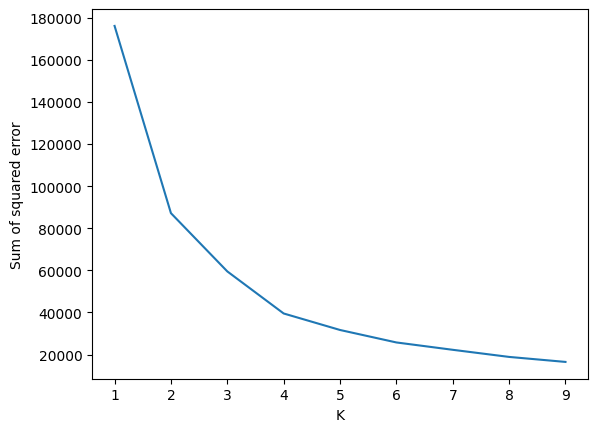

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)